In [1]:
library("tidyverse")

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'broom'


In [250]:
library("ggplot2")
#install.packages("DT")
library("DT")

In [244]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  county_fips_code = col_character(),
  county_name = col_character(),
  state = col_character(),
  state_fips_code = col_character(),
  date = col_date(format = ""),
  geo_id = col_character(),
  pop_5_years_over = col_logical(),
  speak_only_english_at_home = col_logical(),
  speak_spanish_at_home = col_logical(),
  speak_spanish_at_home_low_english = col_logical(),
  pop_15_and_over = col_logical(),
  pop_never_married = col_logical(),
  pop_now_married = col_logical(),
  pop_separated = col_logical(),
  pop_widowed = col_logical(),
  pop_divorced = col_logical()
)
See spec(...) for full column specifications.


In [245]:
cases

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
50009,Essex County,VT,50,2021-01-19,111,0,50009,994,1726,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50007,Chittenden County,VT,50,2021-01-19,3636,78,50007,27549,37357,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
10001,Kent County,DE,10,2021-01-19,11548,187,10001,19148,44233,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44009,Washington County,RI,44,2021-01-19,5521,122,44009,16912,32696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
33001,Belknap County,NH,33,2021-01-19,2496,79,33001,8260,16319,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44005,Newport County,RI,44,2021-01-19,3578,6,44005,13438,21983,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50015,Lamoille County,VT,50,2021-01-19,312,1,50015,4086,6315,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
09013,Tolland County,CT,09,2021-01-19,6255,125,09013,19146,35732,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50001,Addison County,VT,50,2021-01-19,527,5,50001,5283,9418,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50005,Caledonia County,VT,50,2021-01-19,307,4,50005,4763,7331,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [220]:
cases <- cases %>% mutate_if(is.character, factor)
dim(cases)

[1] 3142  259

In [221]:
cases_CA <- cases %>% filter(state == "CA")
dim(cases_CA)

[1]  58 259

In [222]:
summary(cases_CA)

 county_fips_code           county_name     state    state_fips_code
 06001  : 1       Alameda County  : 1   CA     :58   06     :58     
 06003  : 1       Alpine County   : 1   AK     : 0   01     : 0     
 06005  : 1       Amador County   : 1   AL     : 0   02     : 0     
 06007  : 1       Butte County    : 1   AR     : 0   04     : 0     
 06009  : 1       Calaveras County: 1   AZ     : 0   05     : 0     
 06011  : 1       Colusa County   : 1   CO     : 0   08     : 0     
 (Other):52       (Other)         :52   (Other): 0   (Other): 0     
      date            confirmed_cases       deaths            geo_id  
 Min.   :2021-01-19   Min.   :     40   Min.   :    0.0   06001  : 1  
 1st Qu.:2021-01-19   1st Qu.:   2673   1st Qu.:   27.5   06003  : 1  
 Median :2021-01-19   Median :  11114   Median :  119.0   06005  : 1  
 Mean   :2021-01-19   Mean   :  51668   Mean   :  581.7   06007  : 1  
 3rd Qu.:2021-01-19   3rd Qu.:  39784   3rd Qu.:  440.5   06009  : 1  
 Max.   :2021-01-19   

In [223]:
cases_CA_race <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop,median_age)
cases_CA_race <- cases_CA_race %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)

cases_CA_economic <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, median_income, income_per_capita, median_rent, poverty, commuters_by_public_transportation )
cases_CA_economic <- cases_CA %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
)

cases_CA <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop, median_income, median_age, poverty, commuters_by_public_transportation )
cases_CA <- cases_CA %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)
# summary(cases_CA)

In [224]:
datatable(cases_CA) %>% formatRound(c(5, 9, 10), 2) %>% formatPercentage(11, 2)

HTML widgets cannot be represented in plain text (need html)

In [225]:
counties <- map_data("county") %>% as_tibble()
counties_CA <- counties %>% 
  filter(region == "california") %>% 
  rename(county = subregion)

In [226]:
cases_CA <- cases_CA %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust <- counties_CA %>% left_join(cases_CA)

Joining, by = "county"


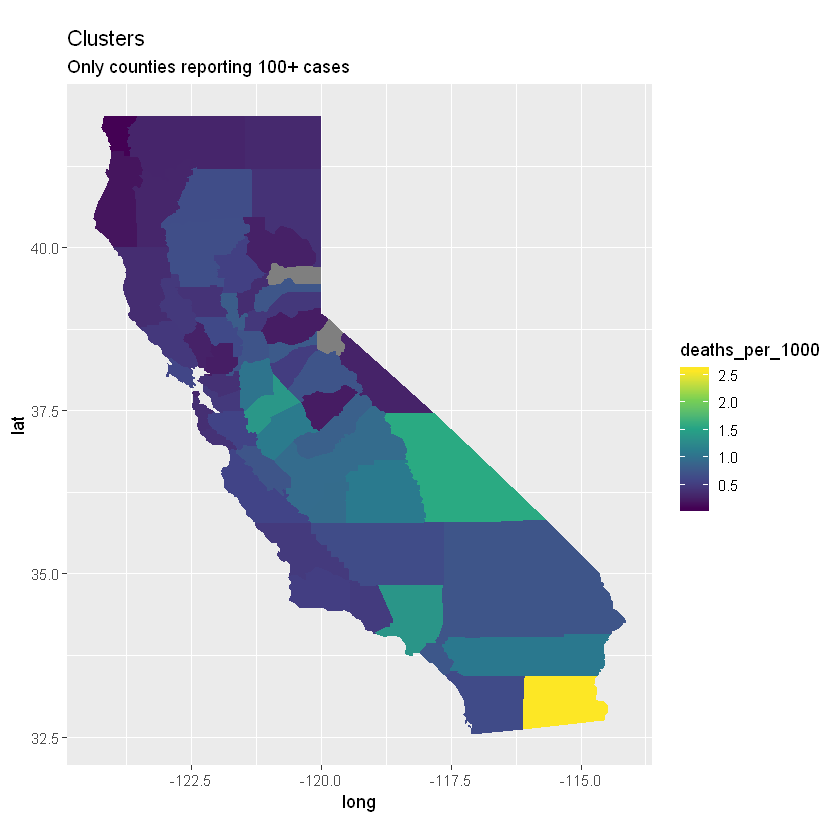

In [227]:
ggplot(counties_CA_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = deaths_per_1000)) +
  coord_quickmap() +
  scale_fill_continuous(type = "viridis") +
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

In [228]:
cases_CA_race_scaled <- cases_CA_race %>% 
  select(
    median_age,
    male_pop, 
    female_pop, 
    white_pop, 
    black_pop,
    asian_pop,
    hispanic_pop,
    amerindian_pop,
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

cases_CA_economic_scaled <- cases_CA_economic %>% 
  select(
    male_pop, 
    female_pop, 
    median_income, 
    income_per_capita, 
    median_rent, 
    poverty, 
    commuters_by_public_transportation 
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

In [236]:
km_race <- kmeans(cases_CA_race_scaled, centers = 5)

km_economic <- kmeans(cases_CA_economic_scaled, centers = 5)
km_economic

K-means clustering with 5 clusters of sizes 31, 1, 15, 5, 6

Cluster means:
    male_pop female_pop median_income income_per_capita median_rent    poverty
1 -0.3347160 -0.3340963  -0.724078028       -0.59767252  -0.7665069 -0.2622735
2  6.4067982  6.4413923  -0.001819358        0.03896186   0.5507550  6.7156364
3 -0.2640011 -0.2610509   0.554285267        0.35873085   0.5884793 -0.2778007
4  1.2404525  1.2251067   0.291100857       -0.03818220   0.5739699  1.0912720
5  0.2878588  0.2843041   2.113075823        2.21647240   1.9189869  0.0209151
  commuters_by_public_transportation
1                         -0.3211128
2                          5.9937735
3                         -0.2772684
4                          0.1966387
5                          1.1894260

Clustering vector:
 [1] 1 3 1 1 1 3 1 3 1 1 1 1 1 1 1 3 3 1 3 1 1 1 3 3 1 1 3 1 1 1 1 1 1 1 1 5 1 1
[39] 3 1 5 2 3 1 3 3 5 3 5 5 4 4 1 4 5 3 4 4

Within cluster sum of squares by cluster:
[1] 14.647911  0.000000  9.840891  7.96

In [230]:
counties <- as_tibble(map_data("county"))
counties_CA <- counties %>%
  filter(region == "california") %>%
  rename(county = subregion)

In [231]:
cases_CA_race <- cases_CA_race %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_race <- counties_CA %>% left_join(cases_CA_race %>% 
    add_column(cluster = factor(km_race$cluster)))

cases_CA_economic <- cases_CA_economic %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_economic <- counties_CA %>% left_join(cases_CA_economic %>% 
    add_column(cluster = factor(km_economic$cluster)))

Joining, by = "county"
Joining, by = "county"


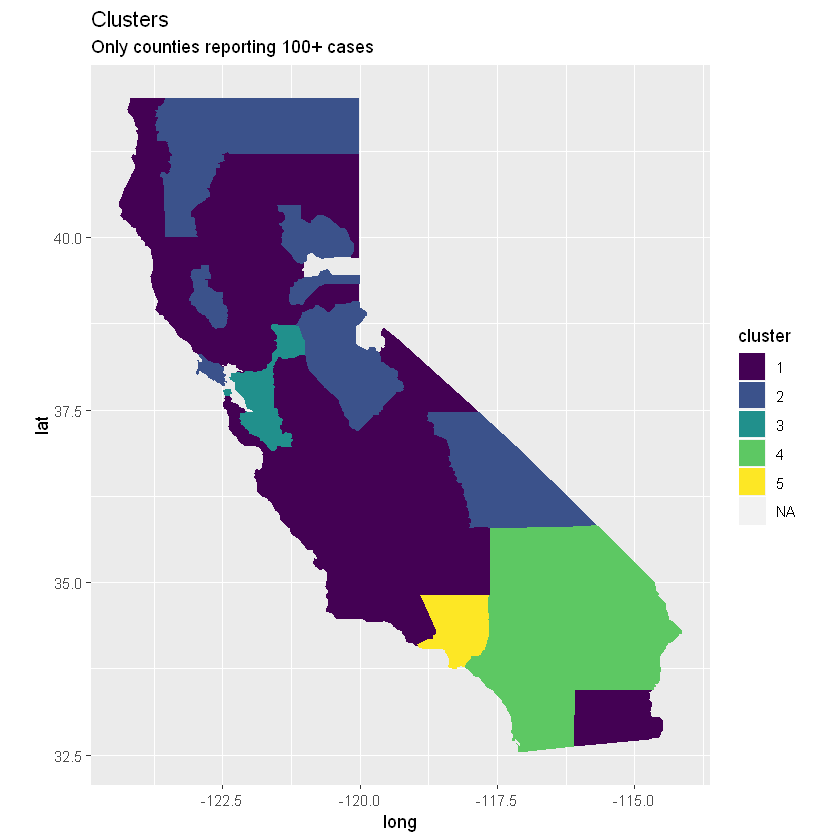

In [232]:
ggplot(counties_CA_clust_race, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

In [233]:
cases_CA_race_km <- cases_CA_race %>% add_column(cluster = factor(km$cluster))

cases_CA_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000))

cluster,avg_cases,avg_deaths
1,38.64727,0.5312581
2,99.21251,1.3790207
3,76.78664,0.6868446
4,57.97208,0.5853010
5,71.49539,0.7069611


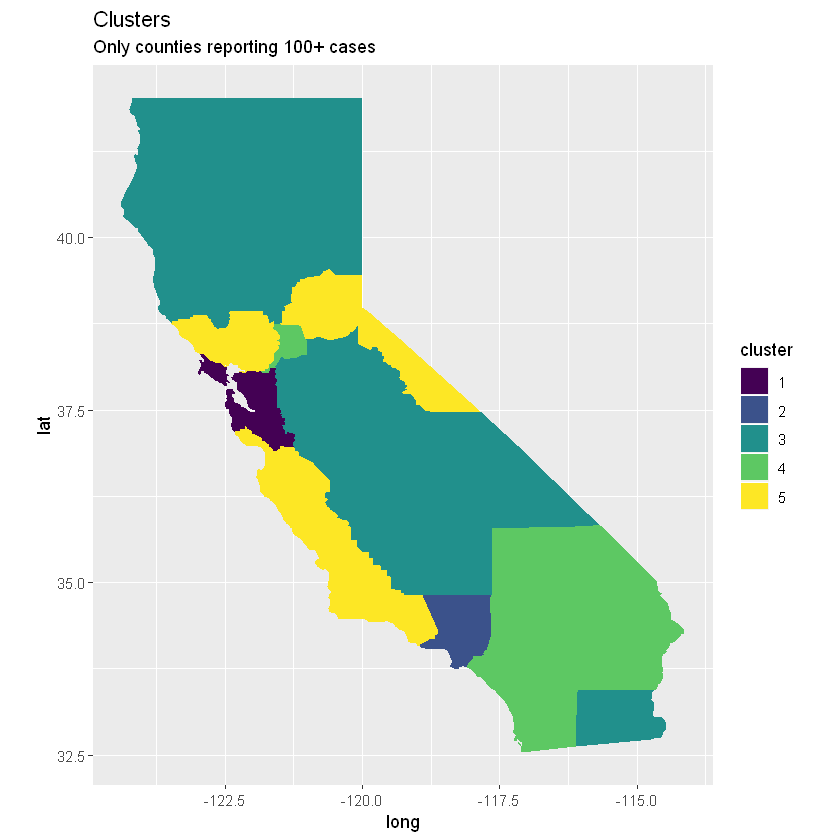

In [234]:
ggplot(counties_CA_clust_economic, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

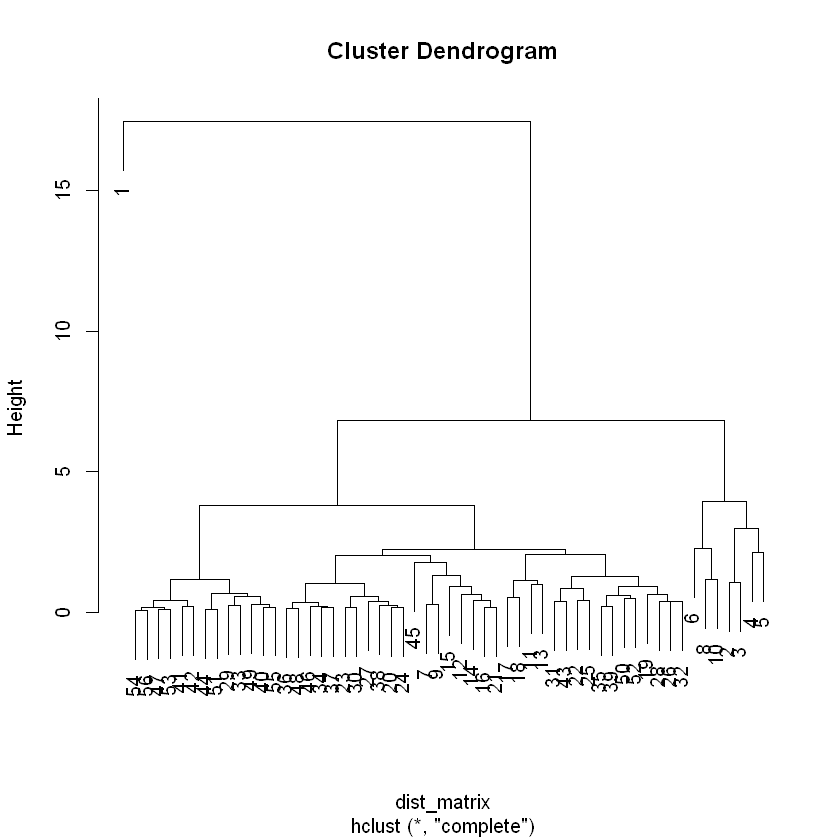

In [246]:
# Compute the distance matrix
dist_matrix <- dist(cases_CA_race_scaled)

# Perform hierarchical clustering
hc <- hclust(dist_matrix)

# Plot the dendrogram
plot(hc)

In [248]:
clusters <- cutree(hc, k = 5)
cluster_complete <- ruspini_scaled %>%
  add_column(cluster = factor(clusters))
cluster_complete

ERROR: Error in eval(lhs, parent, parent): object 'ruspini_scaled' not found


In [249]:
sessionInfo()

Warning message in FUN(X[[i]], ...):
"DESCRIPTION file of package 'stringr' is missing or broken"Warning message in FUN(X[[i]], ...):
"DESCRIPTION file of package 'ggplot2' is missing or broken"

ERROR: Error: $ operator is invalid for atomic vectors
